**MNIST Data**

In [1]:
## Connect Colab and Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("/content/drive/MyDrive/train.csv")

In [4]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)

In [7]:
print(m,n)

42000 785


In [9]:
## Splitting the data
train_data = data[0:int(0.8*m), :]
val_data = data[int(0.8*m):m, :]

X_train = train_data[:, 1:].T
X_train = X_train / 255.0 ## Scaling the train images
Y_train = train_data[:, 0]

X_val = val_data[:, 1:].T
X_val = X_val / 255.0 ## Scaling the val images
Y_val = val_data[:, 0]

In [10]:
print(X_val.shape)
print(Y_val.shape)
print(X_train.shape)
print(Y_train.shape)

(784, 8400)
(8400,)
(784, 33600)
(33600,)


In [11]:
def initialize_parameters():
  W1 = np.random.rand(10, 784) - 0.5
  B1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  B2 = np.random.rand(10, 1) - 0.5
  return W1, B1, W2, B2

def ReLU(X):
  return np.maximum(X, 0)

def softmax_calculator(Z):
  return np.exp(Z) / sum(np.exp(Z))

def forward_propagation(W1, B1, W2, B2, X):
  Z1 = W1.dot(X) + B1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + B2
  A2 = softmax_calculator(Z2)
  return Z1, A1, Z2, A2

def one_hot_converter(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  return one_hot_Y.T

def backward_propagation(W1, B1, W2, B2, Z1, A1, Z2, A2, X, Y):
  one_hot_Y = one_hot_converter(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  dB2 = 1 / m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * (Z1 > 0)
  dW1 = 1 / m * dZ1.dot(X.T)
  dB1 = 1 / m * np.sum(dZ1)
  return dW1, dB1, dW2, dB2

def update_parameters(W1, B1, W2, B2, dW1, dB1, dW2, dB2, learning_rate):
  W1 = W1 - learning_rate * dW1
  B1 = B1 - learning_rate * dB1
  W2 = W2 - learning_rate * dW2
  B2 = B2 - learning_rate * dB2
  return W1, B1, W2, B2

def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
  W1, B1, W2, B2 = initialize_parameters()

  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_propagation(W1, B1, W2, B2, X)
    dW1, dB1, dW2, dB2 = backward_propagation(W1, B1, W2, B2, Z1, A1, Z2, A2, X, Y)
    W1, B1, W2, B2 = update_parameters(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)

    if (i%20)==0:
      print("Iteration number: ", i)
      print("Accuracy = ", get_accuracy(get_predictions(A2), Y))
  return W1, B1, W2, B2

In [13]:
W1, B1, W2, B2 = gradient_descent(X_train, Y_train, 0.1, 1500)

Iteration number:  0
Accuracy =  0.07678571428571429
Iteration number:  20
Accuracy =  0.21107142857142858
Iteration number:  40
Accuracy =  0.2586904761904762
Iteration number:  60
Accuracy =  0.32800595238095237
Iteration number:  80
Accuracy =  0.44285714285714284
Iteration number:  100
Accuracy =  0.5210416666666666
Iteration number:  120
Accuracy =  0.5788392857142857
Iteration number:  140
Accuracy =  0.6229464285714286
Iteration number:  160
Accuracy =  0.6561309523809524
Iteration number:  180
Accuracy =  0.6834523809523809
Iteration number:  200
Accuracy =  0.705
Iteration number:  220
Accuracy =  0.7223214285714286
Iteration number:  240
Accuracy =  0.7357440476190477
Iteration number:  260
Accuracy =  0.747827380952381
Iteration number:  280
Accuracy =  0.7588988095238095
Iteration number:  300
Accuracy =  0.768095238095238
Iteration number:  320
Accuracy =  0.775327380952381
Iteration number:  340
Accuracy =  0.7830059523809524
Iteration number:  360
Accuracy =  0.788482142

Predicted label:  [0]
Actual label:  0


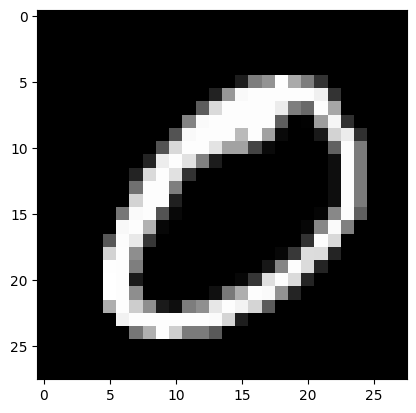

In [14]:
val_index = 560
Z1val, A1val, Z2val, A2val = forward_propagation(W1, B1, W2, B2, X_val[:, val_index, None])
predicted_label = get_predictions(A2val)
actual_label = Y_val[val_index]

print("Predicted label: ", predicted_label)
print("Actual label: ", actual_label)

image_array = X_val[:,val_index].reshape(28,28)
plt.imshow(image_array, cmap='gray')
plt.title(f"Predicted: {predicted_label[0]}, Actual: {actual_label}")
plt.show()

In [15]:
Z1val, A1val, Z2val, A2val = forward_propagation(W1, B1, W2, B2, X_val)
val_acc = get_accuracy(get_predictions(A2val), Y_val)
print("Validation accuracy = ", val_acc)

Validation accuracy =  0.8823809523809524


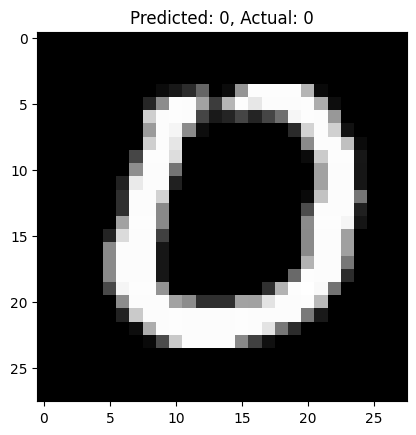

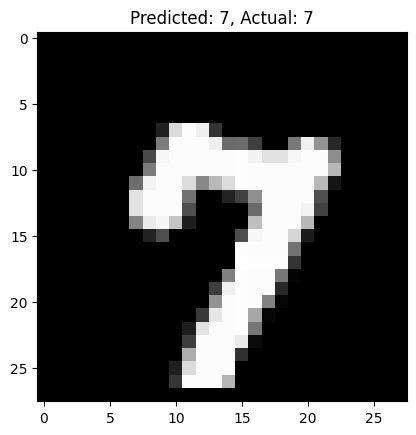

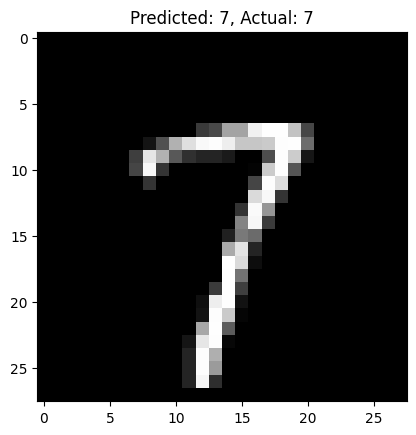

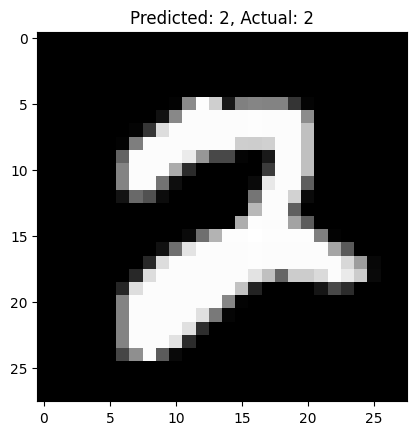

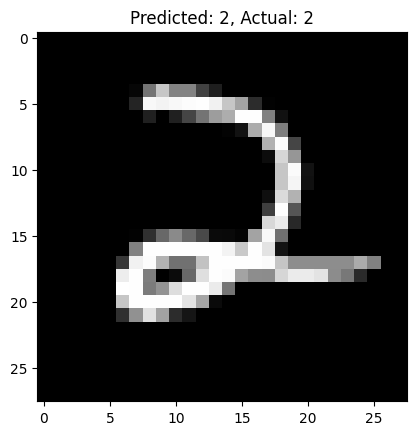

In [16]:
def display_prediction(index, W1, B1, W2, B2, X_val, Y_val):
    """Displays the image, predicted label, and actual label for a given index."""
    Z1, A1, Z2, A2 = forward_propagation(W1, B1, W2, B2, X_val[:, index, None])
    predicted_label = get_predictions(A2)
    actual_label = Y_val[index]

    image_array = X_val[:, index].reshape(28, 28)
    plt.imshow(image_array, cmap='gray')
    plt.title(f"Predicted: {predicted_label[0]}, Actual: {actual_label}")
    plt.show()

# Display predictions for the first 5 validation images
num_images_to_display = 5
for i in range(num_images_to_display):
    display_prediction(i, W1, B1, W2, B2, X_val, Y_val)